# Exploration des données concernant le café

In [14]:
import pandas as pd
from datetime import *
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


%matplotlib inline

In [15]:
# Read the CSV file (utf-8 encoded)
df = pd.read_csv('./data/DataRisaralda_v2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')

Tableaux de colonnes, utile pour grouper

In [16]:
cols = ['Malla 17-18','Malla 14-16','Malla <13','Negros y vinagres','Broca','Broca de punto','Veteado','Mordido',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo','Conchas',
         'Partido','Ambar','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total',
         'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Information sur les scores des tasses par année

In [17]:
PuntajeTotal_groupby_year = df['Puntaje Total'].groupby(df['year'])

PuntajeTotal_groupby_year.describe()

year       
2011  count    350.000000
      mean      65.477500
      std       30.550439
      min        0.000000
      25%       75.562500
      50%       79.000000
      75%       82.000000
      max       85.500000
2016  count    396.000000
      mean      78.164697
      std       11.592704
      min        0.000000
      25%       77.937500
      50%       81.500000
      75%       83.750000
      max       87.750000
Name: Puntaje Total, dtype: float64

## Répartition du total de points pour les années 2011 et 2016

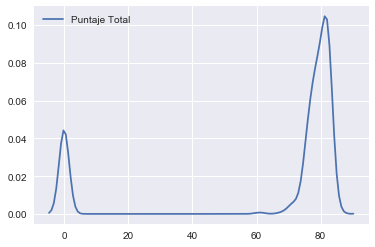

In [18]:
foo = df.ix[(df['year']==2011) ]

sns.kdeplot(foo['Puntaje Total'])

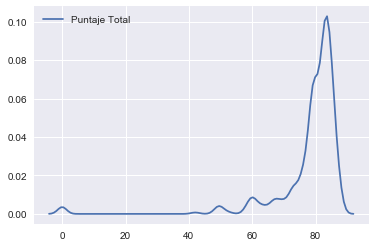

In [19]:
foo = df.ix[(df['year']==2016) ]

sns.kdeplot(foo['Puntaje Total'])

# Analyse de l'occurence des cafés

Combien de fois un café revient-il entre les années ?

L'élimination des doublons s'est faite sur le numéro SICA et la date de test.

In [20]:
# Certains cafés on été testés plusieurs fois, parfois même 2 fois dans la même année mais à plusieurs mois d'intervale. 

dOccurences = df['SICA 1'].value_counts().to_dict() #.to_frame(name='Occurence')

dfOccurences = pd.DataFrame.from_dict(dOccurences, orient='index')

# Ajout d'une colonne contenant le nombre d'occurence

df['occurence'] = 0

# Fonctionne pas dans datacleaning...?
df['SICA 1'] = df['SICA 1'].astype(str)


for index, row in df.iterrows():
    df.set_value(index, 'occurence', dOccurences.get(str(row['SICA 1'])))

#print df['occurence']

print df['occurence'].value_counts()




Series([], Name: occurence, dtype: int64)


In [21]:
df_1 = df[df['occurence'] == 2]

fields = ['SICA 1','Fecha Analysis','year']
df_1[fields].sort_values(['SICA 1'])

,SICA 1,Fecha Analysis,year


# Comptage du nombre de cafés avec plus de 80 points (specialty coffee)

In [9]:
print df[(df['Puntaje Total']>=80)].shape
print df[(df['Puntaje Total']<80)].shape

(402, 142)
(365, 142)


Sur la totalité des cafés, toutes années confondues, nous avons plus de la moitié qui peut être considéré comme "Specialty coffee" du fait que le nombre de points obtenus sur 100 est supérieur à 80. 



In [1]:
# On enlève Mordido, conchas et ambar et les Malla -> pas présent partout
coffee = ['Negros y vinagres','Broca','Broca de punto','Veteado',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
         'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total','year']
coffee1 = ['Negros y vinagres','Broca','Broca de punto','Veteado',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
         'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total']

coffeepoints = ['Aroma-Fragancia', 'Acidez','Cuerpo','Sabor','Sabor residual','Dulzor','Uniformidad','Balance',
                'Taza limpia','Puntaje catador','Puntaje Total','year']

In [2]:
print df.shape

NameError: name 'df' is not defined

# Analyse de la PCA


(767, 28)


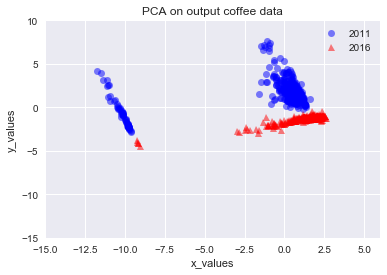

In [154]:
# Some coffee have missing datas in the notation (points) (they are bad)
dftmp = df[coffee].dropna(axis=1, how='any')
print dftmp.shape

mat = np.array(dftmp[coffee1])

#print numpy.isnan(mat).any()


#print np.argwhere(np.isnan(mat))
       
#print mat

mlab_pca = mlabPCA(mat)
last_index = mlab_pca.Y.shape[0]

start_newyear = 0
for index,row in dftmp.iterrows():
    if row['year'] == 2011:
        continue
    else:
        start_newyear = index
        break



#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:start_newyear,0],mlab_pca.Y[0:start_newyear,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][2])
plt.plot(mlab_pca.Y[start_newyear:last_index,0], mlab_pca.Y[start_newyear:last_index,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-15,6])
plt.ylim([-15,10])
plt.legend()
plt.title('PCA on output coffee data')

plt.show()

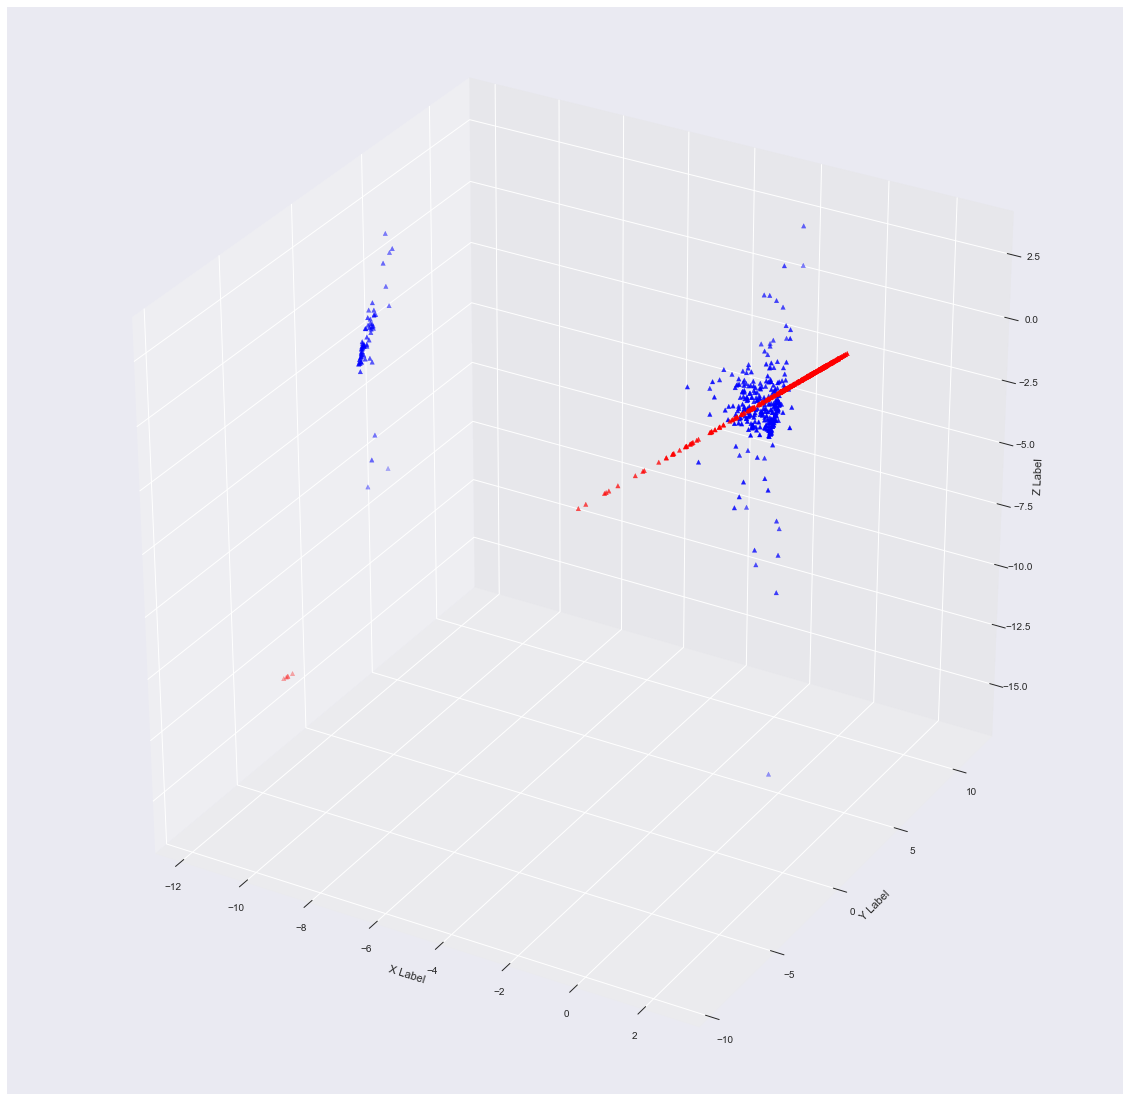

In [142]:
'''import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(dftmp)

pca.components_

sns.jointplot(pca.components_[0],pca.components_[1])
'''


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = mlab_pca.Y[0:start_newyear,0]
ys = mlab_pca.Y[0:start_newyear,1]
zs = mlab_pca.Y[0:start_newyear,2]

ax.scatter(xs, ys, zs, c=c, marker=m)

xs = mlab_pca.Y[start_newyear:last_index,0]
ys = mlab_pca.Y[start_newyear:last_index,0]
zs = mlab_pca.Y[start_newyear:last_index,0]

ax.scatter(xs, ys, zs, c='red', marker=m)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()



(767, 12)


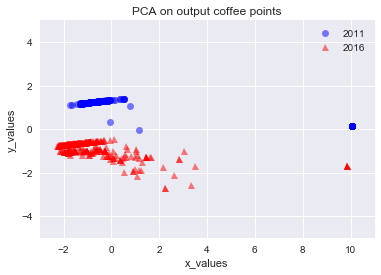

In [150]:
# Some coffee have missing datas in the notation (points) (they are bad)
dftmp = df[coffeepoints].dropna(axis=1, how='any')
print dftmp.shape

mat = np.array(dftmp[coffeepoints])

#print numpy.isnan(mat).any()


#print np.argwhere(np.isnan(mat))
       
#print mat

mlab_pca = mlabPCA(mat)
last_index = mlab_pca.Y.shape[0]

start_newyear = 0
for index,row in dftmp.iterrows():
    if row['year'] == 2011:
        continue
    else:
        start_newyear = index
        break



#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:start_newyear,0],mlab_pca.Y[0:start_newyear,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][2])
plt.plot(mlab_pca.Y[start_newyear:last_index,0], mlab_pca.Y[start_newyear:last_index,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-3,11])
plt.ylim([-5,5])
plt.legend()
plt.title('PCA on output coffee points')

plt.show()

# Autres graphiques

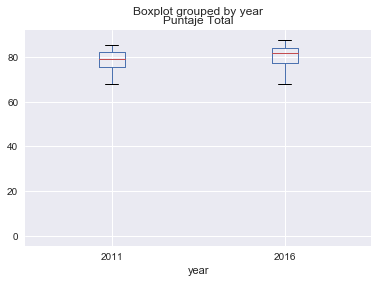

In [12]:
df.boxplot('Puntaje Total', 'year')

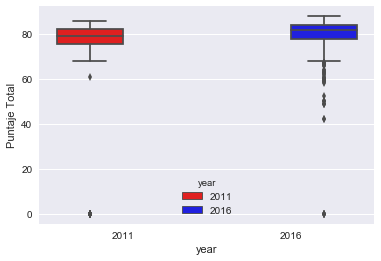

In [13]:
ax = sns.boxplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')



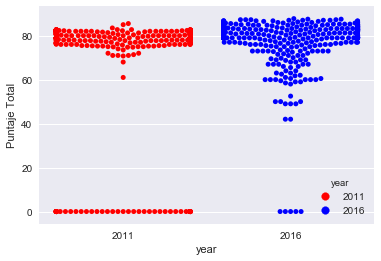

In [14]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')


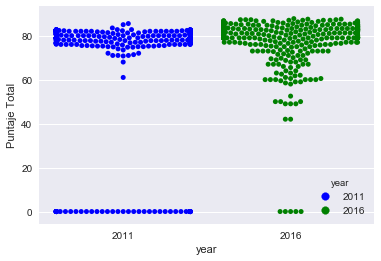

In [15]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['blue','green'], orient='v')

# Observations

On peut aisément voir que l'année 2016 compte beaucoup moins de cafés de mauvaise qualité ayant échoué totalement (0 points). 

# Analyse du café par rapport aux classes


In [25]:
# Read the CSV file (utf-8 encoded)
df_class = pd.read_csv('./data/DataRisaralda_v2Numeric_Complete_class_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')

In [36]:
print("Tmin")
Tmin_grp_class = df_class['TminTotalAvg'].groupby(df_class['category'])
print Tmin_grp_class.describe()


print("Tmax")
Tmax_grp_class = df_class['TmaxTotalAvg'].groupby(df_class['category'])
print Tmax_grp_class.describe()


print("ASNM")
Asnm_grp_class = df_class['ASNM'].groupby(df_class['category'])
print Asnm_grp_class.describe()


print("Prec")
Prec_grp_class = df_class['PrecTotalAvg'].groupby(df_class['category'])
print Prec_grp_class.describe()


print("DTR")
Dtr_grp_class = df_class['DtrTotalAvg'].groupby(df_class['category'])
print Dtr_grp_class.describe()




df_compact_1 = pd.read_csv('./data/df_compact_1_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')


print("Variété")
Var_grp_class = df_compact_1['ASNM'].groupby(df_compact_1['VARIEDAD'])
print Var_grp_class.describe()

Tmin
category       
2         count     54.000000
          mean      15.555556
          std        1.110272
          min       13.000000
          25%       15.000000
          50%       16.000000
          75%       16.000000
          max       18.000000
3         count    334.000000
          mean      15.721557
          std        0.850904
          min       13.000000
          25%       15.000000
          50%       16.000000
          75%       16.000000
          max       18.000000
4         count    358.000000
          mean      16.036313
          std        1.026986
          min       13.000000
          25%       15.000000
          50%       16.000000
          75%       17.000000
          max       20.000000
Name: TminTotalAvg, dtype: float64
Tmax
category       
2         count     54.000000
          mean      25.277778
          std        1.234973
          min       22.000000
          25%       24.250000
          50%       25.000000
          75%       26.

Observations:

Les meilleurs cafés (catégorie 2) se trouvent généralement plus en altitude ce qui implique plusieurs choses comme un écart de température (DTR) plus important, moins de précipitations

In [30]:
for c in df_class.columns:
    print c

SICA
prec1
prec2
prec3
prec4
prec5
prec6
prec7
prec8
prec9
prec10
tmin1
tmin2
tmin3
tmin4
tmin5
tmin6
tmin7
tmin8
tmin9
tmin10
tmax1
tmax2
tmax3
tmax4
tmax5
tmax6
tmax7
tmax8
tmax9
tmax10
tmean1
tmean2
tmean3
tmean4
tmean5
tmean6
tmean7
tmean8
tmean9
tmean10
dtr1
dtr2
dtr3
dtr4
dtr5
dtr6
dtr7
dtr8
dtr9
dtr10
PrecTotalAvg
TminTotalAvg
TmaxTotalAvg
TmeanTotalAvg
DtrTotalAvg
PrecTotal
TminTotal
TmaxTotal
TmeanTotal
DtrTotal
year
ASNM
LUMINOSID
pH_avg
org_avg
franco_L1
arcilloso_L1
limoso_L1
arenoso_L1
cascajoso_L1
franco_L2
arcilloso_L2
limoso_L2
arenoso_L2
cascajoso_L2
franco_L3
arcilloso_L3
limoso_L3
arenoso_L3
cascajoso_L3
NegrosYVinagres
Broca
BrocaDePunto
Veteado
Inmaduro
Flojo
Sobresecado
Arrugado
Aplastado
Cristalizado
Reposado
Granizo
Partido
DefectosTotales
Humedad%
Merma%
Aroma-Fragancia
Acidez
Cuerpo
Sabor
SaborResidual
Dulzor
Uniformidad
Balance
TazaLimpia
PuntajeCatador
PuntajeTotal
category
